# Operation State Aggregation Per Days

## Data Transformation

#### Importing libraries

In [16]:
# libraries
import math
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tsam.timeseriesaggregation as tsam

#### Setting up the path

In [ ]:
DirName = os.getcwd()
CaseName  = '9n'
CaseName1 = '9n_ByStages'
_path = os.path.join(DirName, CaseName)
_path1 = os.path.join(DirName, CaseName1)

#### Loading data from CSV

In [18]:
dfProfiles = pd.read_csv(_path+'/oT_Data_Profiles_'              +CaseName+'.csv', index_col=[0,1,2])

#### Naming Indexes

In [19]:
dfProfiles.index.names = ['Scenario', 'Period', 'LoadLevel']

#### Reset indexes and rename column of values

In [20]:
dfProfiles = dfProfiles.reset_index()

In [21]:
dfProfiles['Date'] = dfProfiles['LoadLevel']
dfProfiles['Date'] = dfProfiles['Date'].str.slice(0, -6)
dfProfiles['Date'] = pd.to_datetime(dfProfiles['Date'], errors='coerce')

In [22]:
dfProfiles.set_index(['Date'])

,Scenario,Period,LoadLevel,Demand,Solar,Wind,Hydro
Date,,,,,,,
2030-01-01 00:00:00,sc01,y2030,2030-01-01T00:00:00+01:00,9087.576562,0.00075,941.481509,280.330471
2030-01-01 01:00:00,sc01,y2030,2030-01-01T01:00:00+01:00,8603.842333,0.00075,1000.629683,258.340755
2030-01-01 02:00:00,sc01,y2030,2030-01-01T02:00:00+01:00,8334.790300,0.00075,1048.676407,258.419965
2030-01-01 03:00:00,sc01,y2030,2030-01-01T03:00:00+01:00,8199.483078,0.00075,1086.565557,258.301045
2030-01-01 04:00:00,sc01,y2030,2030-01-01T04:00:00+01:00,8291.117627,0.00075,1123.035170,258.278661
...,...,...,...,...,...,...,...
2030-12-30 19:00:00,sc01,y2030,2030-12-30T19:00:00+01:00,10842.142360,0.00075,465.573226,758.348403
2030-12-30 20:00:00,sc01,y2030,2030-12-30T20:00:00+01:00,9618.560391,0.00075,457.646891,759.638723
2030-12-30 21:00:00,sc01,y2030,2030-12-30T21:00:00+01:00,8651.192879,0.00075,456.989565,760.978821


In [23]:
# remove the column LoadLevel
dfProfiles = dfProfiles.drop(['Scenario','Period','LoadLevel'], axis=1)

In [24]:
dfProfiles = dfProfiles.set_index(['Date'])

In [25]:
dfProfiles

,Demand,Solar,Wind,Hydro
Date,,,,
2030-01-01 00:00:00,9087.576562,0.00075,941.481509,280.330471
2030-01-01 01:00:00,8603.842333,0.00075,1000.629683,258.340755
2030-01-01 02:00:00,8334.790300,0.00075,1048.676407,258.419965
2030-01-01 03:00:00,8199.483078,0.00075,1086.565557,258.301045
2030-01-01 04:00:00,8291.117627,0.00075,1123.035170,258.278661
...,...,...,...,...
2030-12-30 19:00:00,10842.142360,0.00075,465.573226,758.348403
2030-12-30 20:00:00,9618.560391,0.00075,457.646891,759.638723
2030-12-30 21:00:00,8651.192879,0.00075,456.989565,760.978821


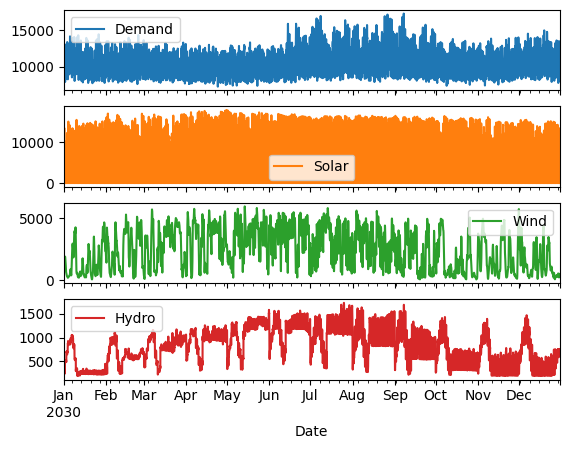

In [26]:
axes = dfProfiles.plot(sharex = True, subplots = True)

In [27]:
def plotTS(data, periodlength, vmin, vmax):
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', vmin = vmin, vmax = vmax)
    axes.set_aspect('auto')  
    axes.set_ylabel('Hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label('Demand [MW]')

## Aggregate the data
#### Initialize an aggregation to typical weeks.

In [28]:
aggregation = tsam.TimeSeriesAggregation(dfProfiles, noTypicalPeriods = 5, hoursPerPeriod = 24*7, 
                                        clusterMethod = 'k_medoids', 
                                        extremePeriodMethod = 'new_cluster_center',
                                       addPeakMin = ['Hydro','Solar','Wind'], addPeakMax = ['Demand'] )

#### Create the typical periods

In [29]:
typPeriods = aggregation.createTypicalPeriods()

c:\Users\erik_\miniconda3\lib\site-packages\tsam\timeseriesaggregation.py:1079: UserWarning: Something went wrong: At least one minimal value of the aggregated time series exceeds the minimal value the input time series
  warnings.warn(


In [30]:
typPeriods.to_csv(_path+'/oT_Aggr_TypicalPeriods_'              +CaseName+'.csv')

In [31]:
predictedPeriods = aggregation.predictOriginalData()

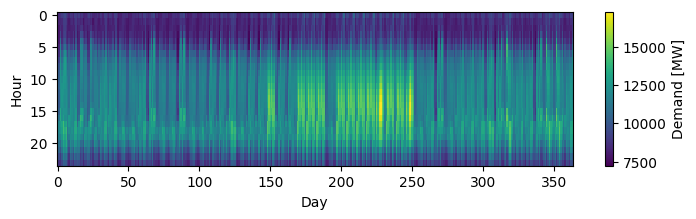

In [32]:

plotTS(predictedPeriods['Demand'], 24, vmin = dfProfiles['Demand'].min(), vmax = dfProfiles['Demand'].max())

#### Show the resulting order of aggregated periods


###### Calculates how the original index is represented by the old index

In [33]:
indexMatching = aggregation.indexMatching()

##### Plot the appearance of the 5+2 aggregated periods in the original timeframe

In [34]:
visDF = pd.DataFrame(0, index = indexMatching.index,
                     columns = aggregation.clusterPeriodIdx)
for col in visDF.columns:
    visDF.loc[indexMatching['PeriodNum']==col,col] = 1

<Axes: xlabel='Date'>

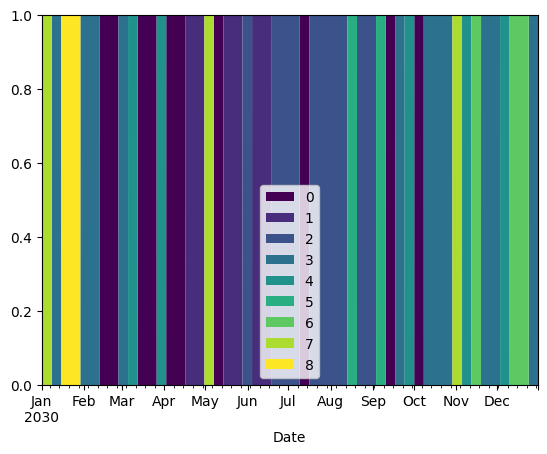

In [35]:

visDF.plot(kind = 'area', cmap = 'viridis', lw = 0, ylim = [0,1])

#### Get input for potential energy system optimization

In [36]:
aggregation.clusterPeriodNoOccur

{0: 10, 1: 6, 2: 10, 3: 11, 4: 5, 5: 2, 6: 3, 7: 3, 8: 2}

In [37]:
aggregation.clusterPeriodIdx

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

[Text(0, 0.5, 'Number of occurence'), Text(0.5, 0, 'Stage index')]

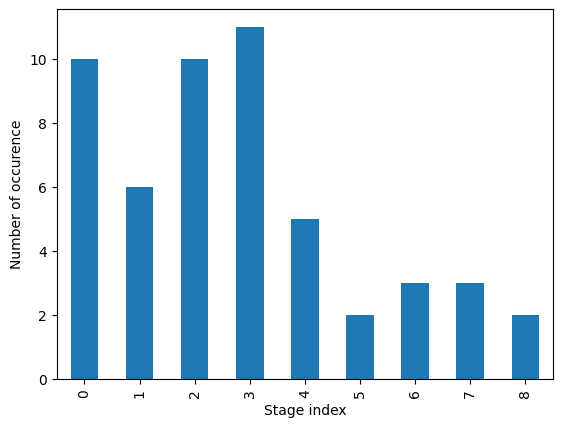

In [38]:
ax = pd.Series(aggregation.clusterPeriodNoOccur).plot(kind='bar')
ax.set(ylabel = 'Number of occurence', xlabel = 'Stage index')

In [39]:
a = aggregation.clusterOrder

In [40]:
print(a)

[7, 3, 8, 8, 3, 3, 0, 0, 3, 4, 0, 0, 4, 0, 0, 1, 1, 7, 0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 5, 2, 2, 5, 0, 3, 4, 0, 3, 3, 3, 7, 4, 6, 3, 3, 4, 6, 6, 3]


In [41]:
aggregation.typicalPeriods.head()

Demand       Hydro    Solar         Wind
  TimeStep                                               
0 0         8596.698216  320.496874  0.00075  4848.022970
  1         7923.411888  275.243665  0.00075  4780.367669
  2         7839.612000  273.710323  0.00075  4659.440619
  3         7938.511541  274.381692  0.00075  4491.985617
  4         8183.679263  274.488756  0.00075  4256.511138

In [42]:
aggregation.clusterCenterIndices

[10, 20, 28, 41, 44]

In [43]:
aggregation.extremeClusterIdx

[5, 6, 7, 8]

In [44]:
aggregation.representationDict

{'Demand': 'mean', 'Hydro': 'mean', 'Solar': 'mean', 'Wind': 'mean'}